In [91]:
import numpy as np
import numpy.linalg as la
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Gradientenverfahren

In [92]:
def Gradientenverfahren(A,y,x=0):
    EPSILON = 1e-8
    N = B.shape[0]
    if (x.all == 0):
        x = np.zeros([N,1])
    if not x.shape[1] == 1:
        print("X must be Nx1 array.")

    r =  y-A.dot(x) # -grad(f)
    f = 1/2*x.T.dot(B).dot(x)-x.T.dot(y)
    KMAX = 100
    k = 1
    PSIG_x = np.array(x)
    PSIG_f = np.array([f])

    # oft gebrauchte Operationen könnten noch ausgegliedert werden...
    
    while (k < KMAX):
            #print("Start iteration ", k)         
            alpha_new = (r.T.dot(r))/(r.T.dot(A).dot(r))
            x_new = x + alpha_new*r
            r_new = y - A.dot(x_new)
            #print("r = \n", r)
            #print("alpha_new = \n", alpha_new)
            #print("x_new = \n", x_new)
            #print("r_new = \n", r_new)
            err = la.norm(r,2)/la.norm(y,2)
            k = k + 1
            r = np.copy(r_new)
            x = np.copy(x_new)
            
            # Funktionswert f(x)
            f = 1/2*x.T.dot(B).dot(x)-x.T.dot(y)
            PSIG_x = np.concatenate((PSIG_x,x),axis=1)
            PSIG_f = np.append(PSIG_f,f)
            #, np.array([x,f]),axis=0)
            
            if (err < EPSILON):
                print("Gradient Method:\n x = \n", x)
                print("Residual: r = ", la.norm(r,2))
                print("Took ", k, " iterations.")
                return PSIG_x,PSIG_f
            
    print("Error. Too many iterations.")
    return x

In [93]:
B = np.array([[3,2],[2,6]])
y =np.array([[2],[-8]])
#Lösen mit Invertieren
print("Soll: x = \n",la.inv(B).dot(y))
# Lösen mit Gradientenverfahren
x_values, f_values = Gradientenverfahren(B,y,x=np.array([[2],[4]])) # startwert für x definiert
#Plot
p = 50
a,b = np.meshgrid(np.linspace(-5,5,p),np.linspace(-5,5,p))
xx = np.dstack((a,b))
f = lambda x: 0.5*x.T.dot(B).dot(x) - y.T.dot(x)
F = np.zeros([p,p])
for i in range(p):
    for j in range(p):
        F[i,j] = f(xx[i,j])
    
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(a,b,F,cmap='viridis')
ax.plot(x_values[0,:],x_values[1,:],f_values)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Soll: x = 
 [[ 2.]
 [-2.]]
Gradient Method:
 x = 
 [[ 2.]
 [-2.]]
Residual: r =  5.7570020885e-09
Took  14  iterations.


<IPython.core.display.Javascript object>

## Conjugate-Gradient Verfahren

In [109]:
def ConjugateGradient(A,y):
    EPSILON = 1e-8
    
    N = A.shape[0]
    
    x = np.zeros([N,1])
    p = np.zeros([N,1])
    
    r =  y
    KMAX = 1000
    k = 0
   
    f = 1/2*x.T.dot(B).dot(x)-x.T.dot(y)
    PSIG_x = np.array(x)
    PSIG_f = np.array([f])

    # oft gebrauchte Operationen könnten noch ausgegliedert werden...
    
    while (k < KMAX):
            if k==0:
                beta_new = 0
            else:
                beta_new = (r.T.dot(r))/(r_old.T.dot(r_old))
            p_new = r + beta_new*p
            d_new = A.dot(p_new)
            alpha_new = (r.T.dot(r))/(d_new.T.dot(p_new))
            x_new = x + np.multiply(alpha_new,p_new)
            r_new = r - np.multiply(alpha_new,d_new)
           
            
            r_old = np.copy(r)
            r = np.copy(r_new)
            x = np.copy(x_new)
            p = np.copy(p_new)
            
            err = la.norm(r,2)/la.norm(y,2)
            k = k + 1
        
            # Funktionswert f(x)
            f = 1/2*x.T.dot(B).dot(x)-x.T.dot(y)
            PSIG_x = np.concatenate((PSIG_x,x),axis=1)
            PSIG_f = np.append(PSIG_f,f)
            
            if (err < EPSILON):
                print("Conjugate Gradient Method:\n x = \n", x)
                print("Residual: r = ", la.norm(r,2))
                print("Took ", k, " iterations.")
                return PSIG_x,PSIG_f
            
    print("Error. Too many iterations.")
    return 0,0

Soll: x = 
 [[ 2.]
 [-2.]]
Start iteration  0
Start iteration  1
Conjugate Gradient Method:
 x = 
 [[ 2.]
 [-2.]]
Residual: r =  9.93013661299e-16
Took  2  iterations.


<IPython.core.display.Javascript object>


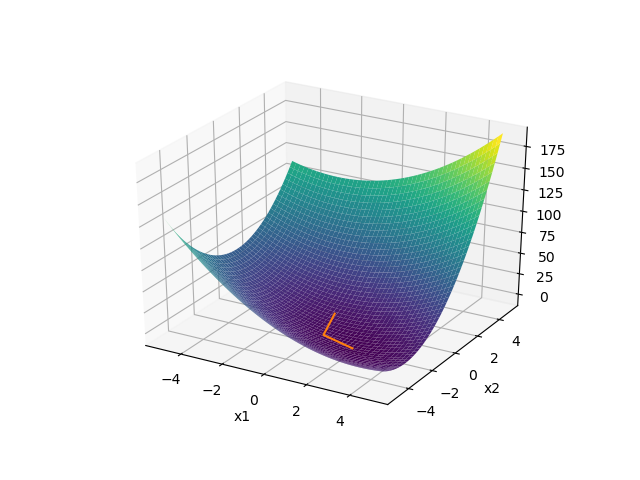

In [110]:
B = np.array([[3,2],[2,6]])
y =np.array([[2],[-8]])
#Lösen mit Invertieren
print("Soll: x = \n",la.inv(B).dot(y))
# Lösen mit Congugate Gradient
x_values, f_values = ConjugateGradient(B,y) # startwert für x definiert
#Plot
p = 50
a,b = np.meshgrid(np.linspace(-5,5,p),np.linspace(-5,5,p))
xx = np.dstack((a,b))
f = lambda x: 0.5*x.T.dot(B).dot(x) - y.T.dot(x)
F = np.zeros([p,p])
for i in range(p):
    for j in range(p):
        F[i,j] = f(xx[i,j])
    
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot_surface(a,b,F,cmap='viridis')
ax.plot(x_values[0,:],x_values[1,:],f_values)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Test mit sparse Matrix

In [111]:
import scipy.io
import os
path_to_file = os.path.join('Vorlagen','sparse_matrix2.mat')
file_contents = scipy.io.loadmat(path_to_file)
matrix = file_contents['B']

B = matrix.todense()
y = np.random.rand(50,1)

print(B.shape)
print(y.shape)

# Lösen mit Congugate Gradient
x_values, f_values = ConjugateGradient(B,y)

(50, 50)
(50, 1)
Start iteration  0
Start iteration  1
Start iteration  2
Start iteration  3
Start iteration  4
Start iteration  5
Start iteration  6
Start iteration  7
Start iteration  8
Start iteration  9
Start iteration  10
Start iteration  11
Start iteration  12
Start iteration  13
Start iteration  14
Start iteration  15
Start iteration  16
Start iteration  17
Start iteration  18
Start iteration  19
Start iteration  20
Start iteration  21
Start iteration  22
Start iteration  23
Start iteration  24
Start iteration  25
Conjugate Gradient Method:
 x = 
 [[ 0.66056692]
 [ 0.77517994]
 [ 1.17073418]
 [ 1.18693806]
 [ 1.18669067]
 [ 0.84498634]
 [ 0.75687828]
 [ 0.62574459]
 [ 0.6674194 ]
 [ 0.96844907]
 [ 0.89393948]
 [ 1.08397083]
 [ 1.19776078]
 [ 1.27005864]
 [ 1.21120973]
 [ 0.87995388]
 [ 0.95351593]
 [ 1.26381098]
 [ 1.31321102]
 [ 1.09857649]
 [ 0.87485811]
 [ 1.01017777]
 [ 1.22028709]
 [ 1.2181405 ]
 [ 1.43389266]
 [ 1.52754307]
 [ 1.42382115]
 [ 1.31444464]
 [ 1.35298815]
 [ 1

In [101]:
B = np.array([[3,2],[2,6]])
y = np.array([[2]])

print(np.multiply(y,B))
print(y*(y*B))

[[ 6  4]
 [ 4 12]]
[[12  8]
 [ 8 24]]


## Plot values of function F for a given A and y

In [ ]:
B = np.array([[3,2],[2,6]])
y = np.array([[2],[-8]])
p = 50
a,b = np.meshgrid(np.linspace(-5,5,p),np.linspace(-5,5,p))
xx = np.dstack((a,b))
f = lambda x: 0.5*x.T.dot(B).dot(x) - y.T.dot(x)
F = np.zeros([p,p])
for i in range(p):
    for j in range(p):
        F[i,j] = f(xx[i,j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a,b,F,cmap='viridis')
ax.plot([0,2],[0,3],[0,0])